# Case Study - David's Decision Problem

## Learning Objectives:
- Facilitate simulation using SciPy 
- Understand the profit-risk trade-off in decision-making

## Background

### An Excellent Job Offer
    
David Tan, a second-year MBA student at the NUS School of Business, faces a very difficult decision problem now. He has just been notified of an excellent job offer from a top management consulting firm. The firm was so impressed with David’s performance during his internship at its Singapore office last summer. The synergy of Davis’s previous consulting experience (both prior to NUS and during the previous summer) and his NUS MBA education leads to a high likelihood that David would be very successful in the future, if he were to accept the firm’s offer.

David is kind of contemplative individual who sees the bigger picture of events and the consequences of decisions in life. He is very excited about the job offer for a number of good reasons. First, He likes the intellectual and business stimulation of management consulting. Moreover, the salary offer is excellent ($\$$70,000 for the first year). However, he is also apprehensive. The lifestyle of management consultant is taxing. Much of the travel is rather routine to affect his family life. Furthermore, in David’s summer consulting experience he often had to cancel his personal plans at the last minute in order to accommodate the unexpected work in the evenings and on weekends. While Daivd is very energetic and motivated, enjoying hard work, he is also committed to maintaining a healthy personal life as well. Career development is but one piece of his many aspirations.

### A Different Career Path
    
The job offer has catalyzed David to think more seriously about one particular career alternative he has pondered over the last two years, namely to open his own upscale restaurant serving gourmet Western cuisine. David is attracted to this plan for several reasons. For one, he has always wanted to start his own business. Second, he has always had a passion and talent for gourmet Western cuisine. Third, he enjoys being a good host, and in fact hospitality has always been an integral part of his lifestyle.

What makes David hesitate the most is that restaurant owners may also need to work extremely long hours; his aunt Sona owns a restaurant in Jurong East, and she is always working. But as hard as his aunt works, David feels that these hours constitute a very different lifestyle from that of a managerial consultant. There would be very little if any travel involved and so he would be able to participate more in his community. And although the restaurant business might demand extreme effort from time to time, David figures that such situations would not arise as often as in a consulting career. The most important difference for David is that he would be working for himself, and that the business would be more fun than consulting (although he also enjoyed consulting quite a bit as well). David believes that his high energy, management skills, and interest in gourmet Western cuisine would form the essential ingredients needed to open and successfully operate his own restaurant, which he has temporarily named the Dallas Restaurant and Bar.

The non-financial advantages of consulting (variety of work, intellectual challenge) seem to be evenly matched against the non-financial advantages of opening the Dallas Restaurant and Bar (less travel, business ownership). The financial implications of the two alternatives might be very different, however. In addition to his desire to earn a good salary, David also would like to pay off his educational debt obligations, which are rather substantial. In order to maintain a reasonable lifestyle he would need to earn approximately $\$$5,000 per month before taxes.

### Making an Informed Decision
    
As part of one of his course projects last semester on entrepreneurship, David actually conducted a profitability analysis of a sample of gourmet Western restaurants in Singapore,including his aunt’s restaurant. David used the information to define benchmark costs and revenues for the Dallas Restaurant and Bar concept. These data were based on siting the restaurant, with a seating capacity of 50 patrons, in the Westgate area, borrowing money to construct the interior structure, and leasing all capital equipment for the restaurant.

David estimated the monthly non-labor fixed costs of operating the Dallas Restaurant and Bar to be $\$$4,000 per month. He also estimated the variable costs of food to be $\$$12 per meal served. Among the many uncertainties in the restaurant business, there were three uncertain variables that tended to dominate the profitability: the number meals sold (per month), the revenue per meal, and the labour costs of the restaurant. From the market survey he conducted, David should be able to estimate the possible distributions for these crucial uncertain variables, as follows.

### Task 1: Determine a possible probability distribution for the number of meals sold
Please refer to `Demand_new.csv`. In this data file, a sample of the monthly meals sold at a similar resturant was recorded. From the sample data, please propose a possible probability distribution for the monthly meals sold to assist with David's decision-making  

In [3]:
import pandas as pd

df_demand = pd.read_csv("Demand_new.csv")
df_demand.tail(10)

,mealsSold
490,2843
491,4833
492,2247
493,3726
494,3757
495,3081
496,4399
497,1737
498,3982
499,1195


In [2]:
df_demand.describe() # summarize the data imported

,mealsSold
count,500.000000
mean,2987.920000
std,1013.057772
min,-310.000000
25%,2309.750000
50%,2990.000000
75%,3674.500000
max,6504.000000


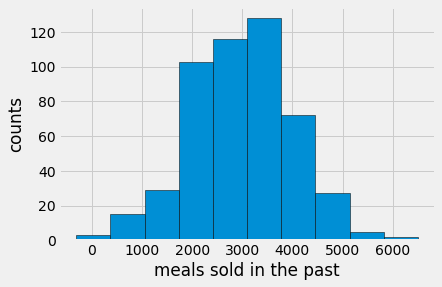

In [31]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")


plt.hist(df_demand['mealsSold'], edgecolor="k")
plt.xlabel("meals sold in the past")
plt.ylabel("counts")
plt.show()

In [37]:
df_demand.sort_values(by = 'mealsSold', inplace = True)

In [38]:
import numpy as np

df_demand['sortind'] = np.arange(1, df_demand.shape[0]+1)
df_demand

,mealsSold,sortind
286,-310,1
411,76,2
229,167,3
363,426,4
340,478,5
...,...,...
371,5527,496
438,5541,497
34,5786,498
388,6262,499


In [39]:
df_demand['percenObs'] = df_demand['sortind'] / df_demand.shape[0]
df_demand

,mealsSold,sortind,percenObs
286,-310,1,0.002
411,76,2,0.004
229,167,3,0.006
363,426,4,0.008
340,478,5,0.010
...,...,...,...
371,5527,496,0.992
438,5541,497,0.994
34,5786,498,0.996
388,6262,499,0.998


Let's look at the fifth smallest value above; the corresponding `mealsSold` value is 478. Thus, 478 is the 1% percentile of the observed data.

In [40]:
Obs_mean = df_demand['mealsSold'].mean()
Obs_std = df_demand['mealsSold'].std()
print('mean is ' + str(Obs_mean))
print('standard deviation is ' + str(Obs_std))  # will be assumed as your normal distribution

mean is 2987.92
standard deviation is 1013.0577721430295


In [41]:
from scipy import stats as sps

# Assume a normal distribution to model the number of meals sold 
# Thus, we need to find out the percentiles of the assumed normal distribution 
df_demand['mealsSoldTheory'] = sps.norm.ppf(df_demand['percenObs'], loc=Obs_mean, scale=Obs_std)
df_demand

,mealsSold,sortind,percenObs,mealsSoldTheory
286,-310,1,0.002,72.175881
411,76,2,0.004,301.220069
229,167,3,0.006,442.972664
363,426,4,0.008,547.549384
340,478,5,0.010,631.195205
...,...,...,...,...
371,5527,496,0.992,5428.290616
438,5541,497,0.994,5532.867336
34,5786,498,0.996,5674.619931
388,6262,499,0.998,5903.664119


In [10]:
np.linspace(0, 7000, 10) #

array([   0.        ,  777.77777778, 1555.55555556, 2333.33333333,
       3111.11111111, 3888.88888889, 4666.66666667, 5444.44444444,
       6222.22222222, 7000.        ])

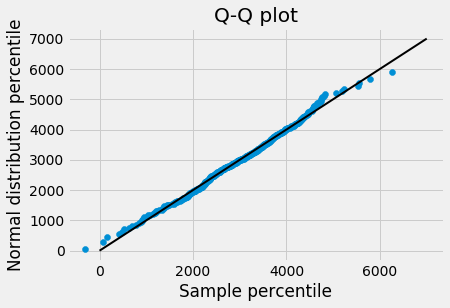

In [43]:
plt.scatter(df_demand['mealsSold'], df_demand['mealsSoldTheory'])
plt.plot(np.linspace(0, 7000, 10), np.linspace(0, 7000, 10), color = 'k', linewidth = 2) # 45-degree line
plt.title('Q-Q plot')
plt.xlabel('Sample percentile')
plt.ylabel('Normal distribution percentile')
plt.show()

# You can use a normal distribution to model the demand

Second, to understand the labour costs, David estimated that the labour costs for the Dallas Restaurant and Bar would be somewhere between $\$$5,040 per month and $\$$6,860 per month. Without any other information, David assumed that actual labour costs would obey a continuous uniform distribution in this range.

Third, since the the Dallas Restaurant and Bar would provide a gourmet dining experience, David would plan to offer fixed price meals and would set the price of the meals according to his own estimate of what the local economy and what the market for gourmet dining would support. His personal estimate based on discussions with friends and gourmet food aficionados, is shown in table below. In this range of meal prices, we will assume, for modeling purpose, that the monthly demand will not be affected by the meal price.

<img src="discrete_prob.jpg" alt="Probability distribution for the price of the meals" style="width: 700px; height: 180px;">

### Task 2: Simulate the probability distribution for the monthly profit
    
With the assumptions made on the number of meals sold (per month), the revenue per meal, and the labour costs of the restaurant, please simulate the possible probability distribution for the monthly revenue of the Dallas Restaurant and Bar. 

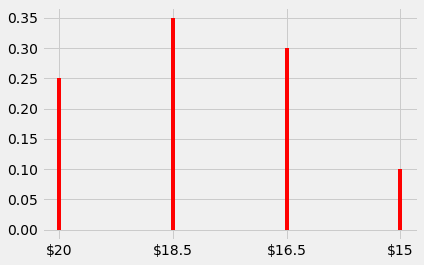

In [44]:
# demo how to simulate a random variable following a discrete distribution

xk = (0, 1, 2, 3) # four possible values for the meal price
pk = (0.25, 0.35, 0.3, 0.1)
custm = sps.rv_discrete(values=(xk, pk))

plt.vlines(xk, 0, custm.pmf(xk), colors='r', linewidth=4)
plt.xticks(xk,["$20","$18.5","$16.5","$15"]) #
plt.show()

In [14]:
rv = custm.rvs(size=100) # simulate 100 random numbers following the specified discrete distribution
rv

array([3, 0, 1, 2, 0, 2, 3, 1, 2, 0, 3, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 2, 3, 1, 0, 2, 1, 1, 1, 1, 2, 3, 0, 1, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 2, 1, 3, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 3, 2,
       2, 1, 2, 3, 1, 1, 1, 0, 2, 2, 1, 0])

In [45]:
gen_discrete = custm.rvs(size=1)
if gen_discrete == 0:
    gen_price = 20
elif gen_discrete == 1:
    gen_price = 18.5
elif gen_discrete == 2:
    gen_price = 16.5
else:
    gen_price = 15
    
print(gen_price)

16.5


In [46]:
lower_end = 5040 # the lower endpoint of the specified uniform distribution
upper_end = 6860 # the upper endpoint of the specified uniform distribution

gen_labor = sps.uniform.rvs(loc=lower_end, scale=upper_end-lower_end, size = 5000)
pd.Series(gen_labor).describe()

count    5000.000000
mean     5952.548791
std       526.419118
min      5040.566787
25%      5501.529195
50%      5942.540260
75%      6410.253495
max      6859.967926
dtype: float64

In [51]:
simu_realization = []

simu_size = 5000 # simulate 5000 times to understand the profit distribution

per_meal_cost = 12
fixed_cost = 4000

for i in range(simu_size): # simu_size = 5000
    gen_meals = sps.norm.rvs(loc=Obs_mean, scale=Obs_std, size=1) # generate the number of meals sold
    gen_labor = sps.uniform.rvs(loc=lower_end, scale=upper_end-lower_end, size = 1) # generate the labor cost
    gen_discrete = custm.rvs(size=1) # generate the selling price per meal
    
    if gen_discrete == 0:
        gen_price = 20
    elif gen_discrete == 1:
        gen_price = 18.5
    elif gen_discrete == 2:
        gen_price = 16.5
    else:
        gen_price = 15
        
    profit = gen_meals * (gen_price - per_meal_cost) - gen_labor - fixed_cost # profit equation
    simu_realization.append(profit[0])

pd.Series(simu_realization).head(200)    

0      18960.642774
1      11029.526822
2      17983.487292
3        635.588342
4        654.442863
           ...     
195     8894.781514
196    12747.604383
197     6530.661681
198    24182.423644
199    10845.073918
Length: 200, dtype: float64

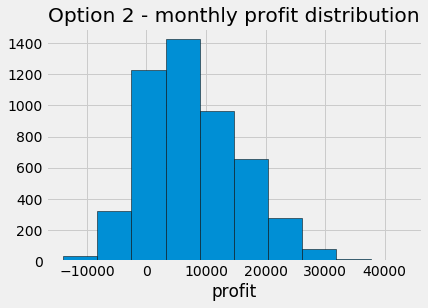

In [52]:
plt.hist(simu_realization, edgecolor = 'k')
plt.title('Option 2 - monthly profit distribution')
plt.xlabel('profit')
plt.show()

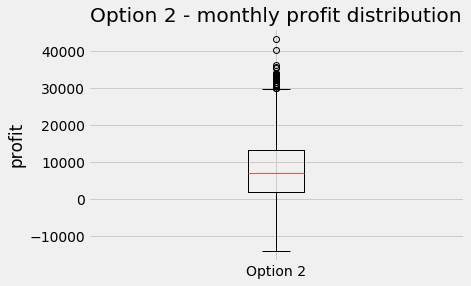

In [53]:
plt.boxplot(simu_realization)
plt.title('Option 2 - monthly profit distribution')
plt.ylabel('profit')
plt.xticks([1],['Option 2'])

plt.show()

In [20]:
pd.Series(simu_realization).describe()

count     5000.000000
mean      7817.454824
std       8020.323684
min     -14656.405829
25%       1779.300965
50%       6977.460771
75%      12929.791143
max      42506.560548
dtype: float64

### An Unusual Partnership Opportunity
    
It was obvious that there would be substantially more risk involved in the Dallas Restaurant and Bar than in accepting the consultant offer. When David mentioned this to his aunt in a phone conversation, she offered David the following financial partnership opportunity to increase his incentive to undertake the Dallas Restaurant and Bar venture. Under the partnership, his aunt would guarantee David a monthly salary of at least $\$$3,500. That is, if earnings in a given month fell below $\$$3,500, she would cover the difference. In exchange for this, his aunt would receive 90$\%$ of all monthly earnings in excess of $\$$9,000. If earnings were between $\$$3,500 and $\$$9,000, all such money would go to David. 

### Task 3: Understand the profit distribution under the partnership

With the partnership condition, please simulate the possible probability distribution for the monthly revenue David can earn.

In [54]:
opt2_profit = pd.Series(simu_realization)

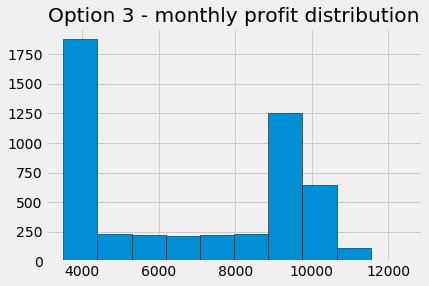

In [55]:
opt3_profit = []

for i in range(simu_size):
    if opt2_profit[i] < 3500:
        profit = 3500
    elif opt2_profit[i] >= 3500 and opt2_profit[i] <= 9000:
        profit = opt2_profit[i]
    else:
        profit = 9000 + (opt2_profit[i]-9000)*0.1
        
    opt3_profit.append(profit)

plt.hist(opt3_profit, edgecolor = 'k')
plt.title('Option 3 - monthly profit distribution')
plt.show()

In [23]:
filt_less3500 = (opt2_profit < 3500)
filt_less3500

0       False
1        True
2        True
3        True
4        True
        ...  
4995    False
4996     True
4997    False
4998     True
4999    False
Length: 5000, dtype: bool

In [24]:
filt_great9000 = (opt2_profit > 9000)
filt_inbetween = (opt2_profit >= 3500) & (opt2_profit <= 9000)

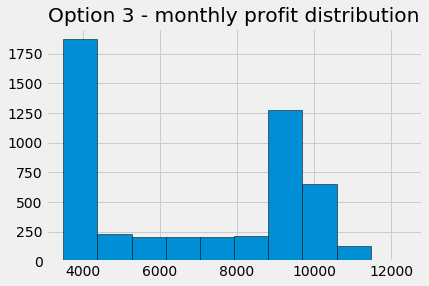

In [25]:
opt3_profit2 = filt_less3500*3500 + filt_inbetween*opt2_profit + filt_great9000*(9000+0.1*(opt2_profit-9000))

plt.hist(opt3_profit2, edgecolor = 'k')
plt.title('Option 3 - monthly profit distribution')
plt.show()

### Taks 4: If you are David, what will be your best decision? 
    
Please provide any visualization or numerical evidence to support your conclution. 

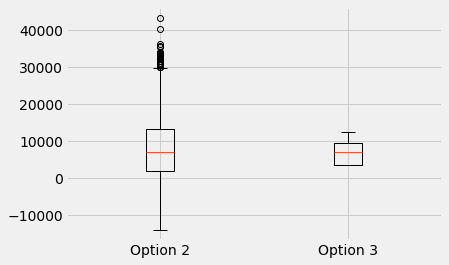

In [56]:
plt.boxplot(x = [opt2_profit, opt3_profit])
plt.xticks([1,2], ['Option 2', 'Option 3'])
plt.show()

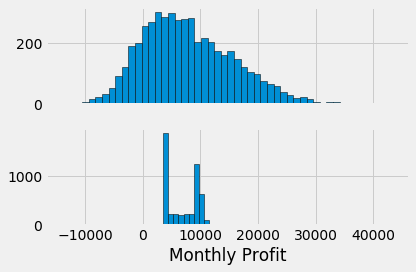

In [57]:
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(opt2_profit, bins = 50, edgecolor = 'k')

ax2.hist(opt3_profit, edgecolor = 'k')
ax2.set_xlabel('Monthly Profit')

plt.tight_layout()
plt.show()

In [58]:
opt_summary = {'Option2': pd.Series(opt2_profit).describe(), 'Option3': pd.Series(opt3_profit).describe()}
opt_summary = pd.DataFrame(opt_summary)
opt_summary['Option1'] = 0

opt_summary.loc['count','Option1'] = 5000
opt_summary.loc['mean','Option1'] = 70000/12
opt_summary.loc['std','Option1'] = 0
opt_summary.loc['min','Option1'] = 70000/12
opt_summary.loc['25%','Option1'] = 70000/12
opt_summary.loc['50%','Option1'] = 70000/12
opt_summary.loc['75%','Option1'] = 70000/12
opt_summary.loc['max','Option1'] = 70000/12


opt_summary

,Option2,Option3,Option1
count,5000.000000,5000.000000,5000.000000
mean,7857.019048,6697.940532,5833.333333
std,7990.935101,2790.870063,0.000000
min,-13994.568177,3500.000000,5833.333333
25%,1990.350796,3500.000000,5833.333333
50%,6906.924775,6906.924775,5833.333333
75%,13156.381786,9415.638179,5833.333333
max,43361.442047,12436.144205,5833.333333


In [59]:
 70000/12

5833.333333333333